#PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.



In [1]:
what_were_covering = {1: "data(prepare and load)",
                      2: "build model",
                      3: "fitting the model to data(training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's buling blocks for neural network
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__

'2.8.0+cu126'

##Data(preparing and loading)

Data can be almost anything... in ML

* Excel spreadsheet
* Images of any kind
* Videos
* Audio like songs or podcast
* DNA
* Text

ML is a game of two parts:
1. Get data into a numberical representation.
2. Build a model to learn patterns in that numerical representatoin.

To showcase this, Let's create some *known* data using the linear regression formula

we'll use a linear regression formula to make a straight line with *known* **parameters**

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start =0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in ML in general)

Let's create a training and test set with our data

In [5]:
#Create a train/test split
train_split =int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

how might we better visualize our data?

This is where the data explorer's motto comes in!
"Visualize, visualize, visualize"

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels, c="b", s=4,label = "Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data,predictions, c="r",s=4, label= "Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

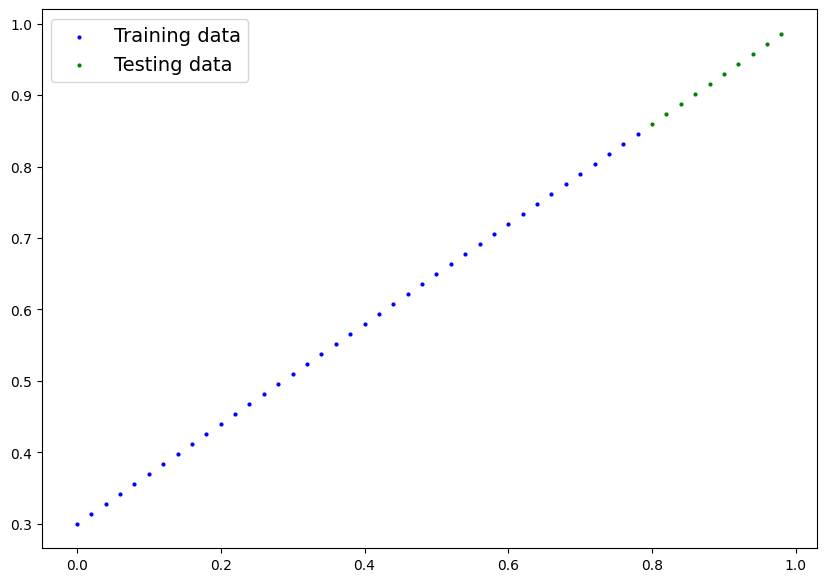

In [7]:
plot_predictions();

## 2. Build model

Our first PyTorch model!

we're going to be building classes throught the course, I'd recommend getting familiar with OOP in python. https://realpython.com/python-classes/#getting-started-with-python-classes

what our model does:
* Start with rnadom values (weight & bias)
* Look at training data and adjust the random values to better represent (or ger closer to ) the ideal values (the weight & bias values we used to created the data)

How does it do so?

Through two main algorithm:
1. Gradient descent
2. Backpropagation


In [8]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): #<-almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float)) # <- it is the smae as torch.float32
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  #Forward method to define the computatoin in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <-"x" is the inpur data
    return self.weights * x + self.bias

## PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and leran, often PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - all nn.Module subclasses require you to overwirte forward(), this method defines what happens in the forward computatoin

In [9]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### Checking the contents of our PyTorch models

Now we've created a model, let's see what's inside

so we can check our model parameters or what's inside our model using ".parameters()".

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named paremeters
'''
model.state_dict()는 PyTorch에서 모델의 학습 가능한 매개변수(parameters)를 딕셔너리 형태로 저장하는 함수입니다.

PyTorch의 모든 nn.Module에는 state_dict라는 속성이 있습니다. 이는 모델의 모든 레이어와 해당 레이어의 가중치(weights) 및 편향(biases)을 키(key)와 값(value) 쌍으로 매핑한 딕셔너리입니다.
'''
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using 'torch.inference_model()'

To check our model's predivtive power, let's see how well it predicts 'y_test' based on 'X_test'.

When we pass data through our model, it's going to run it through the 'forward()' method

In [12]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [13]:
# Make predictions with model
with torch.inference_mode(): #
  y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however inference_mode() is preferred
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

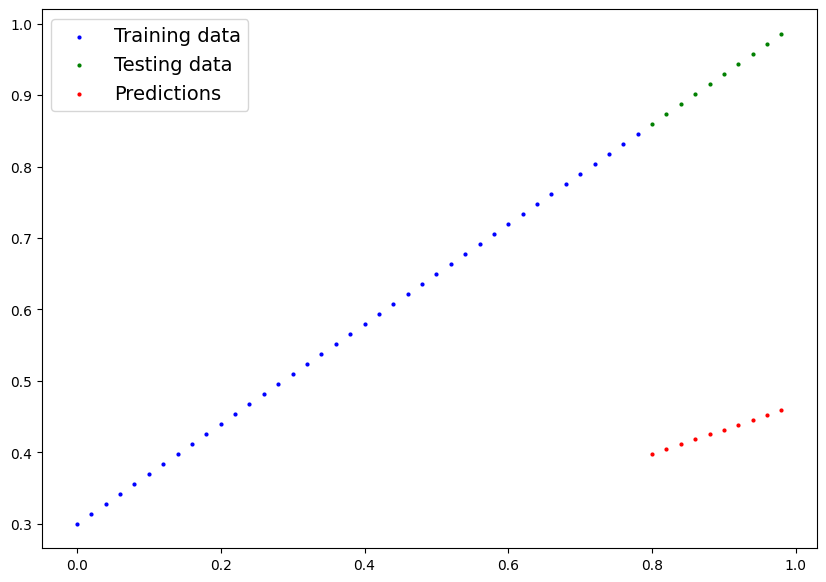

In [15]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training  is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss functoin.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a  loss functoin.

* **Loss function** A function to measure how wrong your model's predictions are to the ideal outputs, lowe is better.
* **Optimizer** Takes into acoount the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.
  * Inside the optimizer you'll often have to set two parameters:
    * 'params' - the model parameters you'd like to optimize, for example 'params= model_0.parameter()
    * lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameter with each step ( a small lr results in small changes, a large lr results in large changes)

And specificially for PyTorch,we need:
* A training loop
* A testing loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #lr = learning rate = possibly the most important hyperparameter you can set


### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data and do...
1. forward pass (this involves data mouing through our model's  'forward()' functions) to make predictions on data - also called forward propagation
2. Calculate the loss (conpares forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each ofthe parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [19]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it)
epochs =200

#Track different values
epoch_count = []
loss_values = []
test_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1.Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so ... we have to zero them above for the next iteration of the loop

  ### Testing
  model_0.eval() #turns off different settings in the model not needed for evaluatoin/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
  # with torch.no_grad(): # you may also set torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

  # Print out what happens
  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_values.append(test_loss)
    print(f"Epoch: {epoch}| loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0| loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10| loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20| loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30| loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40| loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50| loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60| loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70| loss: 0.0347608998

In [20]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

/tmp/ipython-input-1345318780.py:2: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  np.array(torch.tensor(loss_values).numpy())


array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

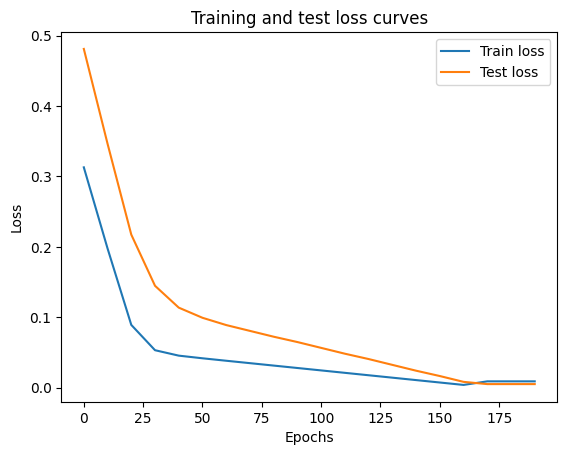

In [21]:
# Plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [22]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
weight, bias

(0.7, 0.3)

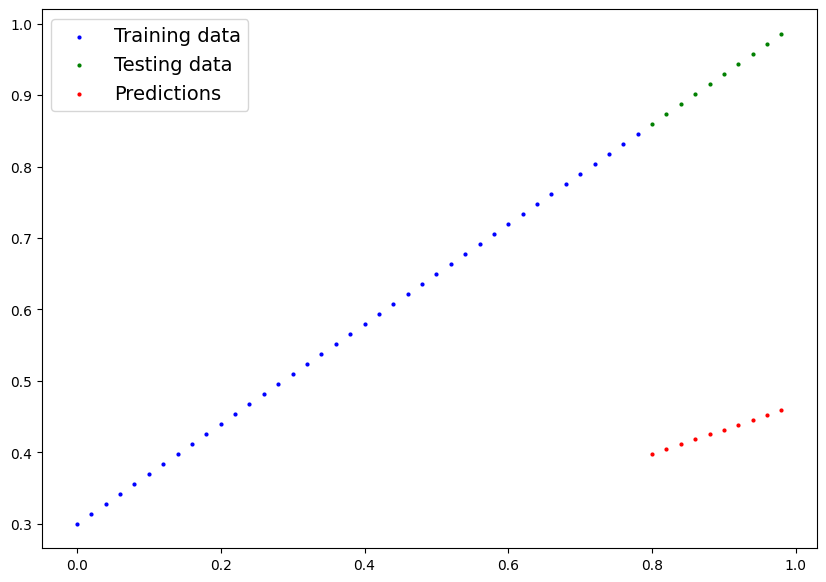

In [25]:
plot_predictions(predictions=y_preds);

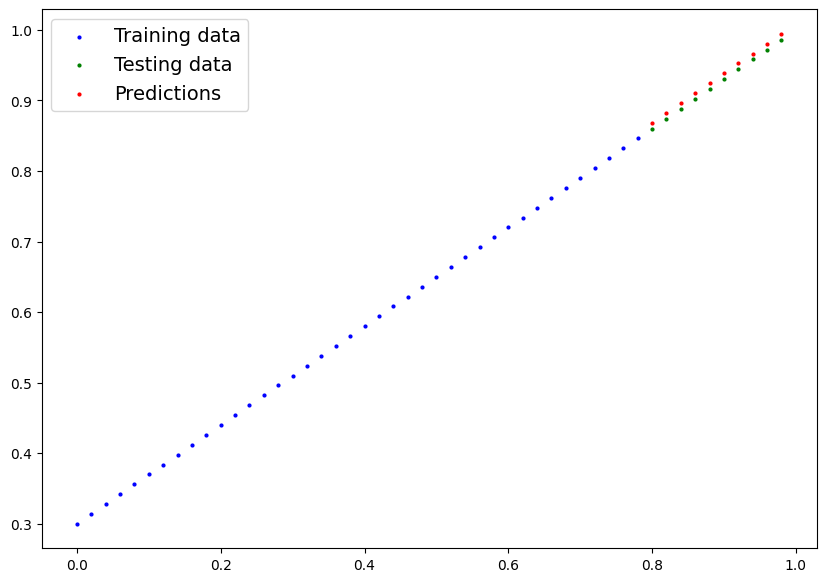

In [26]:
plot_predictions(predictions=y_preds_new);

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. 'torch.save()' - allows you save a PyTorch object in Python's pickle format
2. 'torch.load()' - allows you a saved PyTorch object
3. 'torch.nn.Module.load_state_dict()' - this allows to load a model's saved state dictionary

In [31]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directly
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok = True )

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH} ")
torch.save(obj= model_0.state_dict(),
           f=MODEL_SAVE_PATH )

Saving model to: models/01_pytorch_workflow_model_0.pth 


In [32]:
!ls -1 models

01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's 'state_dict()' rather the entire model, we'll create a new instance of our model class and load the saved
state_dict()' into that

In [33]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [36]:
# TO load in a saved state_dict we have to instantiate a new instance od our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [37]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [39]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [42]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [43]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all on one place

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check out PyTorch version
torch.__version__



'2.8.0+cu126'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing)
If no GPU is available, the code will default to using CPU.

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [3]:
!nvidia-smi

Sat Sep 13 04:12:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

###6.1 Data

In [14]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

#Create X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [18]:
#Split data
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]


In [34]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels, c="b", s=4,label = "Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data,predictions, c="r",s=4, label= "Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

In [41]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error

def plot_predictions (train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels= y_test,
                      predictions = None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,s=4,c="blue",label= "Training data")
  plt.scatter(test_data,test_labels,s=4,c="green",label="Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,s=4,c="red")
  plt.legend(prop={"size":14})

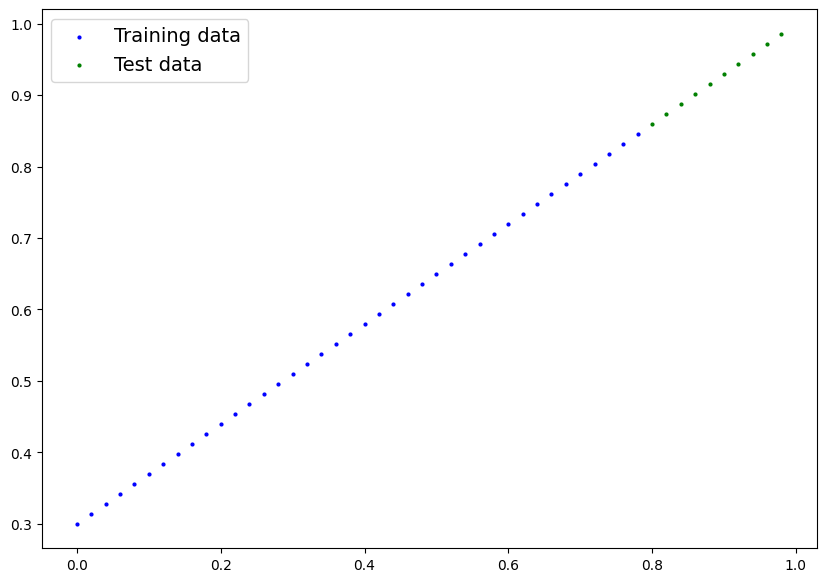

In [42]:
plot_predictions(X_train,y_train,X_test,y_test)

## 6.2 Building a PyTorch Linear model

In [45]:
# Create a linear model by subclassing nn.module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self,x: torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)

# Set the manual_seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [46]:
#Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [47]:
# Set the model to uses the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [53]:
# Setup loss function
loss_fn = nn.L1Loss()

#Set up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [57]:
from ast import mod
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
  model_1.train()

  #1.Forward pass
  y_pred = model_1.forward(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

  # Print out what's happening

  if epoch %10 ==0:
    print(f"Epoch:{epoch} | Loss:{loss} |test:{test_loss}")

Epoch:0 | Loss:0.5551779866218567 |test:0.5739762187004089
Epoch:10 | Loss:0.439968079328537 |test:0.4392664134502411
Epoch:20 | Loss:0.3247582018375397 |test:0.30455657839775085
Epoch:30 | Loss:0.20954833924770355 |test:0.16984669864177704
Epoch:40 | Loss:0.09433845430612564 |test:0.03513690456748009
Epoch:50 | Loss:0.023886388167738914 |test:0.04784907028079033
Epoch:60 | Loss:0.019956795498728752 |test:0.045803118497133255
Epoch:70 | Loss:0.016517987474799156 |test:0.037530567497015
Epoch:80 | Loss:0.013089174404740334 |test:0.02994490973651409
Epoch:90 | Loss:0.009653178043663502 |test:0.02167237363755703
Epoch:100 | Loss:0.006215683650225401 |test:0.014086711220443249
Epoch:110 | Loss:0.00278724217787385 |test:0.005814164876937866
Epoch:120 | Loss:0.0012645035749301314 |test:0.013801801018416882
Epoch:130 | Loss:0.0012645035749301314 |test:0.013801801018416882
Epoch:140 | Loss:0.0012645035749301314 |test:0.013801801018416882
Epoch:150 | Loss:0.0012645035749301314 |test:0.013801801

In [58]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and evauluating predictions

In [59]:
# Turn model into evaluatoin mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

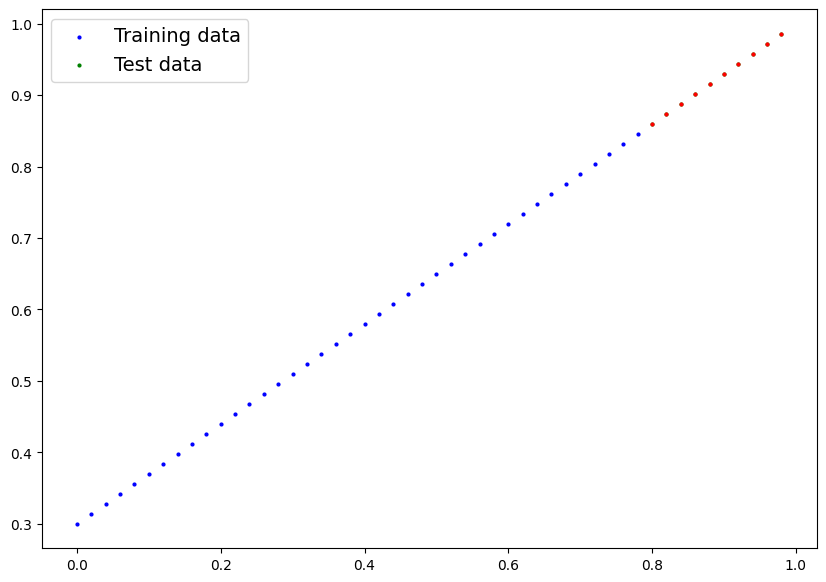

In [65]:
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a trained model

In [70]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_1.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model_1.pth


In [71]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [72]:
# Load a Pytorch

# Create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [74]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [75]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [77]:
#Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [27]:
# 9/11 6:25:09
# 9/12 7:15:53
# 9/13 8:27:30